## Process training dataset

In [1]:
import csv


def csv_to_json_evaluate(csv_file_path: str) -> list[dict]:
    """
    Convert CSV file to JSON format
    Assumes columns: question_text, Answer, Answer2
    """
    data = []
    with open(csv_file_path, 'r', encoding='utf-8') as f:
        reader = csv.DictReader(f)
        for idx, row in enumerate(reader, start=1):
            data.append({
                "input": row.get("input", "").strip(),
                "disease_name": row.get("Disease name", "").strip(),
                "reasoning": row.get("Reasoning", "").strip(),
                "recommendation": row.get("Recommendation", "").strip(),
                "context": row.get("Context", "").strip(),
                "thinking": row.get("Thinking", "").strip(),
            })
    return data

In [2]:
training_data1 = csv_to_json_evaluate('/Volumes/SandiskSSD/Downloads/training_tropical_dataset.csv')

In [3]:
len(training_data1)

39

In [4]:
training_data2 = csv_to_json_evaluate('/Volumes/SandiskSSD/Downloads/data2.csv')

In [5]:
len(training_data2)

39

In [6]:
training_data3 = csv_to_json_evaluate('/Volumes/SandiskSSD/Downloads/data3.csv')

In [7]:
len(training_data3)

39

In [8]:
training_data1

[{'input': "I’ve had a fever that keeps getting higher every day, and now my stomach hurts and I feel extremely tired. I also noticed I'm \nhaving constipation sometimes and then diarrhea the next day. Is this something serious or just a normal infection?",
  'disease_name': 'Typhoid fever',
  'reasoning': 'A fever that rises each day, stomach pain, chills, headache, weakness, and switching between constipation and diarrhea are symptoms that can\n appear in typhoid fever. Some people also get a rash, loss of appetite, or a swollen belly as the illness progresses. Typhoid is caused by the \nbacteria Salmonella enterica serotype typhi, which spreads through contaminated water, ice, uncooked foods like raw fruits without a peel, and \nfood handled by someone who didn’t wash their hands after using the bathroom. These symptoms can come from other infections too, so a \nmedical test is needed to confirm. If the fever or stomach pain increases, seeking medical care is important.',
  'recomme

In [9]:
training_data2

[{'input': 'A 35-year-old woman, currently living in New York after recently returning from a vacation to a Caribbean island, started experiencing sudden high fever, headache, fatigue, a rash, nausea, and red eyes about five days after her return. She has no known pre-existing conditions. After about two weeks, most of her initial symptoms improved, but she has continued to have significant joint and muscle pain for the past two months. What could be causing her prolonged joint and muscle pain after these initial symptoms, considering her recent travel?',
  'disease_name': 'Chikungunya',
  'reasoning': 'The described symptoms, particularly the sudden high fever, headache, rash, and red eyes, followed by persistent joint and muscle pain after travel to a high-risk area, are highly consistent with Chikungunya. This disease is caused by the Chikungunya virus, typically transmitted through the bite of an infected mosquito, and has spread globally, including to Caribbean islands. While many

In [10]:
training_data3

[{'input': "I went camping about 10 days ago and now I feel terrible. I have a moderate fever, chills, and a severe headache. My whole body aches, especially my muscles and joints, and I've been feeling nauseous with some diarrhea. I also noticed a rash on my skin. Is this just a flu or something related to being outdoors?",
  'disease_name': 'Ehrlichiosis',
  'reasoning': 'Moderate fever, chills, severe headache, muscle aches, and gastrointestinal issues like nausea, vomiting, or diarrhea are symptoms that can appear in ehrlichiosis. Some people also experience confusion, changes in mental state, or a rash (though this is more common in children) as the illness progresses. Ehrlichiosis is caused by various species of Ehrlichia bacteria, which spread primarily through the bite of an infected Lone Star tick, commonly found in south-central, southeastern, and eastern coastal states. These symptoms can mimic the flu or other tick-borne diseases like anaplasmosis, so a medical evaluation i

In [11]:
training_data = training_data1 + training_data2 + training_data3

In [12]:
training_data

[{'input': "I’ve had a fever that keeps getting higher every day, and now my stomach hurts and I feel extremely tired. I also noticed I'm \nhaving constipation sometimes and then diarrhea the next day. Is this something serious or just a normal infection?",
  'disease_name': 'Typhoid fever',
  'reasoning': 'A fever that rises each day, stomach pain, chills, headache, weakness, and switching between constipation and diarrhea are symptoms that can\n appear in typhoid fever. Some people also get a rash, loss of appetite, or a swollen belly as the illness progresses. Typhoid is caused by the \nbacteria Salmonella enterica serotype typhi, which spreads through contaminated water, ice, uncooked foods like raw fruits without a peel, and \nfood handled by someone who didn’t wash their hands after using the bathroom. These symptoms can come from other infections too, so a \nmedical test is needed to confirm. If the fever or stomach pain increases, seeking medical care is important.',
  'recomme

In [13]:
len(training_data)

117

In [15]:
import json
json.loads(training_data[0]['context'].strip())['has_gold_chunk']

True

In [14]:
SYSTEM_PROMPT = """
You are an expert in tropical and infectious diseases. Provide an evidence-based likely diagnosis consistent with guidance from authoritative public-health sources (e.g., WHO, CDC) when applicable. You will be provided with symptoms, and contextual information.

Use evidence in this priority order:
1. Patient’s symptoms + history (highest priority)
2. Geography/epidemiology
3. Retrieved RAG cases (supporting evidence only)

Critical rule: Use patient symptoms (PRIMARY) + retrieved cases (SUPPORTING) to diagnose. Keep the final explanation clear and readable. When helpful, interpret lay terms into clinical terms internally, accept both clinical and lay language (e.g., “really tired” → fatigue; “muscles and joints ache” → myalgia/arthralgia).

Output requirements:
    - Start with a single, precise disease name on the first line: "Diagnosis: <disease>"
    - Then provide 2–4 short sentences explaining why this is most likely ("Explanation: ...").
    - Be specific (e.g., "Lassa fever" instead of "viral hemorrhagic fever").
    - If uncertainty exists, mention it briefly but still choose the most likely diagnosis.
"""

## Retriver context extraction from RAG system

In [2]:
from RAG.QdrantRetriever import get_retriever

retriever = get_retriever()

W0131 10:51:41.595000 86141 /Volumes/SandiskSSD/Library/miniforge3/envs/Tropical_Infectious_Disease/lib/python3.13/site-packages/torch/distributed/elastic/multiprocessing/redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.
<All keys matched successfully>
/Volumes/SandiskSSD/Developer/AI_Document/TRINDs_Final_Project/RAG/utils/queryVectorDB.py:16: LangChainDeprecationWarning: The class `Neo4jGraph` was deprecated in LangChain 0.3.8 and will be removed in 1.0. An updated version of the class exists in the `langchain-neo4j package and should be used instead. To use it run `pip install -U `langchain-neo4j` and import as `from `langchain_neo4j import Neo4jGraph``.
  graph = Neo4jGraph(


Connected successfully!


In [3]:
user_question = """
My 10 year old nephew visited the Thanda Safari with us last week. Now he is sick with a fever, skin rash and itching foot. what is happening to him?
"""

hits = await retriever.query(user_question, k=5)
contexts_list = [hit.get("context", "") for hit in (hits or [])]
all_contexts = "\n---\n".join(contexts_list)
print(all_contexts)


[HISTORY OF PRESENT ILLNESS]
Disease: African tick-bite fever
Diagnosis Details: The final diagnosis is African tick-bite fever, caused by Rickettsia africae. This was a clinical diagnosis based on the patient's presentation with fever after travel to an endemic area in Southern Africa, and the pathognomonic finding of an inoculation eschar with regional lymphadenitis. The primary differential of malaria was ruled out with negative blood tests. The patient's rapid clinical improvement on doxycycline therapy further supported the diagnosis.
Vitals: On presentation, after taking 1g of paracetamol, his tympanic temperature was 37.5 °C (99.5 °F), pulse was 80 bpm, and blood pressure was 130/70 mmHg.
Content: A 52-year-old man presented to a tropical medicine clinic with a two-day history of fever, night sweats, and a frontal headache. The symptoms began ten days after he returned from a trip to South Africa. He denied any joint pains and had not noticed a rash. He did report having a skin 

## The difference from training_dataset.ipynb

## Approach A: Run in batches, concurrent but may rate limit (asyncio.gather())

In [26]:
user_question = """
I am a 43 year old man and recently went on a hike to Durian Perangin waterfall in Teluk Intan. I got a fever, headache and a rash on my back since getting back. What disease is this?
"""

hits = await retriever.query(user_question, k=5)
contexts_list = [hit.get("context", "") for hit in (hits or [])]
all_contexts = "\n---\n".join(contexts_list)
print(all_contexts)


[HISTORY OF PRESENT ILLNESS]
Disease: African tick-bite fever
Diagnosis Details: The final diagnosis is African tick-bite fever, caused by Rickettsia africae. This was a clinical diagnosis based on the patient's presentation with fever after travel to an endemic area in Southern Africa, and the pathognomonic finding of an inoculation eschar with regional lymphadenitis. The primary differential of malaria was ruled out with negative blood tests. The patient's rapid clinical improvement on doxycycline therapy further supported the diagnosis.
Vitals: On presentation, after taking 1g of paracetamol, his tympanic temperature was 37.5 °C (99.5 °F), pulse was 80 bpm, and blood pressure was 130/70 mmHg.
Content: A 52-year-old man presented to a tropical medicine clinic with a two-day history of fever, night sweats, and a frontal headache. The symptoms began ten days after he returned from a trip to South Africa. He denied any joint pains and had not noticed a rash. He did report having a skin 

In [39]:
async def enrich_item_with_retrieval(item, retriever):
    """Enrich a single item with RAG context"""
    try:
        hits = await retriever.query(item['input'], k=5)
        contexts_list = [hit.get("context", "") for hit in (hits or [])]
        all_contexts = "\n---\n".join(contexts_list)

        return {
            **item,
            "retrieved_context": all_contexts,
            "messages": [
                {
                    "role": "system",
                    "content": SYSTEM_PROMPT,
                },
                {
                    "role": "user",
                    "content": f"""PATIENT QUESTION:
{item['input']}

RETRIEVED REFERENCE CASES (from medical database):
{all_contexts}

Diagnose based on patient symptoms FIRST, use references to validate."""
                },
                {
                    "role": "assistant",
                    "content": f"Diagnosis: {item['disease_name']}\nExplanation: {item['reasoning']}"
                }
            ]
        }
    except Exception as e:
        print(f"Error processing {item.get('input', '')[:50]}: {e}")
        return None

In [33]:
import json

async def prepare_training_dataset(training_dataset, retriever, batch_size=10):
    """Process entire dataset with controlled concurrency"""
    enriched_dataset = []

    # Process in batches to avoid overwhelming the database
    for i in range(0, len(training_dataset), batch_size):
        batch = training_dataset[i:i+batch_size]
        print(f"Processing batch {i//batch_size + 1}/{(len(training_dataset)-1)//batch_size + 1}")

        # Run all queries in batch CONCURRENTLY
        tasks = [enrich_item_with_retrieval(item, retriever) for item in batch]
        results = await asyncio.gather(*tasks)

        # Filter out None results (failed items)
        enriched_dataset.extend([r for r in results if r is not None])

    return enriched_dataset

# Usage
enriched_data = await prepare_training_dataset(
    training_data,
    retriever,
    batch_size=10  # Process 10 queries in parallel
)

Processing batch 1/12
Error processing I’ve had a fever, constant fatigue, muscle aches, : The size of tensor a (81) must match the size of tensor b (61) at non-singleton dimension 1
Error processing I’ve been having smelly, watery diarrhea for over : The size of tensor a (66) must match the size of tensor b (53) at non-singleton dimension 1
Error processing I’ve been feeling sick for a few days with fever, : The size of tensor a (70) must match the size of tensor b (61) at non-singleton dimension 1
Error processing I’ve been having fever, chills, headaches, and rea: The size of tensor a (65) must match the size of tensor b (53) at non-singleton dimension 1
Error processing I’ve had fever, tiredness, body aches, and swellin: The size of tensor a (64) must match the size of tensor b (53) at non-singleton dimension 1
Error processing I’ve had sudden, nonstop watery diarrhea and some : The size of tensor a (55) must match the size of tensor b (53) at non-singleton dimension 1
Error proces

CancelledError: 

## Approach B: Controlled, safe concurrency (Semaphore max_concurrent=15)

In [55]:
from tqdm.asyncio import tqdm
import asyncio
import nest_asyncio

# Apply this to allow nested event loops
nest_asyncio.apply()

class SerializedRetriever:
    """Wrapper that serializes embedding queries to prevent GPU conflicts"""

    def __init__(self, retriever):
        self.retriever = retriever
        self.embed_semaphore = asyncio.Semaphore(1)

    async def query(self, text, k=5):
        """Query with serialized embedding to avoid tensor mismatch"""
        async with self.embed_semaphore:
            # Only one embedding operation at a time
            return await self.retriever.query(text, k=k)

async def enrich_item_with_retrieval(item, retriever):
    """Enrich item with RAG context"""
    try:
        # Embedding is serialized, but this function can be concurrent
        hits = await retriever.query(item['input'], k=5)
        contexts_list = [hit.get("context", "") for hit in (hits or [])]
        all_contexts = "\n---\n".join(contexts_list)

        return {
            **item,
            "retrieved_context": all_contexts,
            "messages": [
                {
                    "role": "system",
                    "content": SYSTEM_PROMPT,
                },
                {
                    "role": "user",
                    "content": f"""PATIENT QUESTION:
{item['input']}

RETRIEVED REFERENCE CASES (from medical database):
{all_contexts}

Diagnose based on patient symptoms FIRST, use references to validate."""
                },
                {
                    "role": "assistant",
                    "content": f"Diagnosis: {item['disease_name']}\nExplanation: {item['reasoning']}"
                }
            ]
        }
    except Exception as e:
        print(f"Error: {e}")
        return None

async def prepare_training_dataset(training_data, original_retriever):
    """Process dataset with serialized embeddings"""

    # Wrap retriever to serialize embeddings
    retriever = SerializedRetriever(original_retriever)

    # Still use Semaphore for HTTP/I/O concurrency
    semaphore = asyncio.Semaphore(15)

    async def bounded_enrichment(item):
        async with semaphore:
            return await enrich_item_with_retrieval(item, retriever)

    print(f"Processing {len(training_data)} items with serialized embeddings...")

    tasks = [bounded_enrichment(item) for item in training_dataset]
    results = await tqdm.gather(*tasks)

    enriched = [r for r in results if r is not None and not isinstance(r, Exception)]
    print(f"✅ Completed: {len(enriched)} successful, {len(results) - len(enriched)} failed")

    return enriched

async def main():

    # Process with serialized embeddings
    enriched_data = await prepare_training_dataset(training_data, retriever)

    file_path = '/Volumes/SandiskSSD/Downloads/training_data_enriched.jsonl'
    # Save
    with open(file_path, 'w', encoding='utf-8') as f:
        for item in enriched_data:
            f.write(json.dumps(item, ensure_ascii=False) + "\n")
    return enriched_data

# Run
asyncio.run(main()) # or await main()

Processing 117 items with serialized embeddings...


100%|██████████| 117/117 [03:49<00:00,  1.96s/it]

✅ Completed: 117 successful, 0 failed


[{'messages': [{'role': 'system',
    'content': '\nYou are an expert in tropical and infectious diseases. Provide an evidence-based likely diagnosis consistent with guidance from authoritative public-health sources (e.g., WHO, CDC) when applicable. You will be provided with symptoms, and contextual information.\n\nUse evidence in this priority order:\n1. Patient’s symptoms + history (highest priority)\n2. Geography/epidemiology\n3. Retrieved RAG cases (supporting evidence only)\n\nCritical rule: Use patient symptoms (PRIMARY) + retrieved cases (SUPPORTING) to diagnose. Keep the final explanation clear and readable. When helpful, interpret lay terms into clinical terms internally, accept both clinical and lay language (e.g., “really tired” → fatigue; “muscles and joints ache” → myalgia/arthralgia).\n\nOutput requirements:\n    - Start with a single, precise disease name on the first line: "Diagnosis: <disease>"\n    - Then provide 2–4 short sentences explaining why this is most likely 

## Explain how Approach B works

In [27]:
# Training Dataset (100 items)
#         ↓
# [Async Pipeline with 2 Layers of Concurrency Control]
#         ↓
#     Layer 1: HTTP/IO Semaphore (max 10 concurrent)
#     Layer 2: Embedding Semaphore (max 1 sequential)
#         ↓
# Enriched Dataset (100 items with RAG context)


In [ ]:
# ┌─────────────────────────────────────────────────────────┐
# │  START: main()                                          │
# │  - Load training_dataset.json (100 items)              │
# │  - Initialize Qdrant retriever                         │
# └────────────────┬────────────────────────────────────────┘
#                  ↓
# ┌─────────────────────────────────────────────────────────┐
# │  prepare_training_dataset()                             │
# │  - Wrap retriever with SerializedRetriever             │
# │  - Create Semaphore(10) for HTTP concurrency           │
# │  - Create 100 tasks (one per item)                     │
# └────────────────┬────────────────────────────────────────┘
#                  ↓
# ┌─────────────────────────────────────────────────────────┐
# │  asyncio.gather(*tasks)                                 │
# │  - Starts ALL 100 tasks at once                        │
# │  - But only 10 can run simultaneously (HTTP Semaphore) │
# └────────────────┬────────────────────────────────────────┘
#                  ↓
#          ┌───────┴───────┐
#          ↓               ↓
#     [Task 1-10]     [Task 11-100]
#     Running          Waiting
#          │
#          ↓
# ┌─────────────────────────────────────────────────────────┐
# │  Each Task: bounded_enrichment(item)                    │
# │  - Acquires HTTP Semaphore (max 10)                    │
# │  - Calls enrich_item_with_retrieval()                  │
# └────────────────┬────────────────────────────────────────┘
#                  ↓
# ┌─────────────────────────────────────────────────────────┐
# │  enrich_item_with_retrieval(item)                       │
# │  - Calls retriever.query(item['input'], k=5)           │
# └────────────────┬────────────────────────────────────────┘
#                  ↓
# ┌─────────────────────────────────────────────────────────┐
# │  SerializedRetriever.query()                            │
# │  - Acquires Embedding Semaphore (max 1)               │
# │  - ONLY 1 embedding runs at a time                    │
# │  - Waits if another embedding is in progress          │
# └────────────────┬────────────────────────────────────────┘
#                  ↓
# ┌─────────────────────────────────────────────────────────┐
# │  Actual Retriever (Qdrant + Nomic Embedding)           │
# │  - Embed user question (GPU operation)                 │
# │  - Search Qdrant vector DB                             │
# │  - Return top 5 hits                                    │
# └────────────────┬────────────────────────────────────────┘
#                  ↓
# ┌─────────────────────────────────────────────────────────┐
# │  Back to enrich_item_with_retrieval()                   │
# │  - Format retrieved contexts                           │
# │  - Build "messages" dict with system/user/assistant    │
# │  - Return enriched item                                │
# └────────────────┬────────────────────────────────────────┘
#                  ↓
# ┌─────────────────────────────────────────────────────────┐
# │  Task completes, releases HTTP Semaphore               │
# │  → Next waiting task (Task 11) can now start          │
# └────────────────┬────────────────────────────────────────┘
#                  ↓
# ┌─────────────────────────────────────────────────────────┐
# │  asyncio.gather() collects all 100 results              │
# │  - Filters out None/Exceptions                         │
# │  - Returns list of enriched items                      │
# └────────────────┬────────────────────────────────────────┘
#                  ↓
# ┌─────────────────────────────────────────────────────────┐
# │  Back to main()                                         │
# │  - Save to training_data_enriched.jsonl                │
# │  - Done! ✅                                             │
# └─────────────────────────────────────────────────────────┘


⏱️ Timeline: How 100 Tasks Execute
Visual Timeline (100 items, max_concurrent=10, embedding sequential)

In [ ]:
# Time  │ HTTP Semaphore (10 slots)        │ Embedding Semaphore (1 slot)
# ─────────────────────────────────────────────────────────────────────────
# 0.0s  │ Task 1-10 start acquiring slots   │
#       │ [T1][T2][T3][T4][T5][T6][T7][T8] │
#       │ [T9][T10]                         │
#       │ Task 11-100 WAITING               │
# ─────────────────────────────────────────────────────────────────────────
# 0.0s  │                                   │ [T1 embedding] ← Only T1
#       │                                   │ T2-T10 wait for embedding
# ─────────────────────────────────────────────────────────────────────────
# 0.3s  │                                   │ [T2 embedding] ← T1 done, T2 starts
#       │                                   │ T3-T10 still waiting
# ─────────────────────────────────────────────────────────────────────────
# 0.6s  │                                   │ [T3 embedding]
# ─────────────────────────────────────────────────────────────────────────
# 0.9s  │ T1 DONE (releases HTTP slot)      │ [T4 embedding]
#       │ Task 11 starts                    │
#       │ [T2][T3][T4][T5][T6][T7][T8][T9]  │
#       │ [T10][T11]                        │
# ─────────────────────────────────────────────────────────────────────────
# 1.2s  │ T2 DONE, Task 12 starts           │ [T5 embedding]
#       │ [T3][T4][T5][T6][T7][T8][T9][T10] │
#       │ [T11][T12]                        │
# ─────────────────────────────────────────────────────────────────────────
# ...continues until all 100 tasks complete...
# ─────────────────────────────────────────────────────────────────────────
# 30s   │ All 100 tasks completed! ✅        │


🔄 Detailed Step-by-Step for Task 1

In [ ]:
# ┌──────────────────────────────────────────────────────────┐
# │ Task 1: Process item["input"] = "I have fever..."       │
# └──────────────────────────────────────────────────────────┘
#      ↓
# [1] Task 1 tries to acquire HTTP Semaphore
#      ↓
# [2] ✅ HTTP Semaphore: Slot available (1/10 used)
#      ↓
# [3] Task 1 enters bounded_enrichment()
#      ↓
# [4] Calls enrich_item_with_retrieval(item, retriever)
#      ↓
# [5] Calls serialized_retriever.query("I have fever...", k=5)
#      ↓
# [6] SerializedRetriever tries to acquire Embedding Semaphore
#      ↓
# [7] ✅ Embedding Semaphore: Available (0/1 used)
#      ↓
# [8] 🔒 Embedding Semaphore LOCKED (now 1/1 used)
#      │ → Task 2-10 CANNOT embed yet, they wait
#      ↓
# [9] Nomic model embeds "I have fever..." → vector [1, 768]
#      ↓ (0.3 seconds)
# [10] Qdrant searches for similar vectors
#      ↓ (0.2 seconds)
# [11] Returns 5 hits with context
#      ↓
# [12] 🔓 Embedding Semaphore RELEASED (now 0/1 used)
#      │ → Task 2 can now start embedding
#      ↓
# [13] Task 1 formats contexts: "\n---\n".join(contexts)
#      ↓
# [14] Task 1 builds messages dict:
#      {
#        "messages": [
#          {"role": "system", "content": "..."},
#          {"role": "user", "content": "PATIENT QUESTION:\n..."},
#          {"role": "assistant", "content": "Diagnosis: ..."}
#        ]
#      }
#      ↓
# [15] Task 1 returns enriched item
#      ↓
# [16] 🔓 HTTP Semaphore RELEASED (now 9/10 used)
#      │ → Task 11 can now start
#      ↓
# [17] Task 1 COMPLETE ✅


In [ ]:
# 100 tasks created
#   → 10 start HTTP work (Semaphore 10)
#     → But only 1 can embed at a time (Semaphore 1)
#       → First task embeds, searches, formats
#         → Releases embedding lock
#           → Next task embeds
#             → First task finishes, releases HTTP slot
#               → Task 11 starts
#                 → Process continues...
#                   → All 100 complete in ~10 seconds


In [ ]:
# 🧵 Concurrency Comparison
# Without Async (Sequential - Slow)
# text
# Task 1 ▓▓▓▓▓▓▓▓▓▓ (1.0s)
#        Task 2 ▓▓▓▓▓▓▓▓▓▓ (1.0s)
#               Task 3 ▓▓▓▓▓▓▓▓▓▓ (1.0s)
#                      Task 4 ▓▓▓▓▓▓▓▓▓▓ (1.0s)
#                             ...
#                             Task 100 ▓▓▓▓▓▓▓▓▓▓
#
# Total time: 100 × 1.0s = 100 seconds
# With Async (max_concurrent=10, embedding=1)
# text
# Task 1  ▓▓▓▓▓▓▓▓▓▓ (1.0s)
# Task 2  ▓▓▓▓▓▓▓▓▓▓ (1.0s)
# Task 3  ▓▓▓▓▓▓▓▓▓▓ (1.0s)
# ...
# Task 10 ▓▓▓▓▓▓▓▓▓▓ (1.0s)
#         Task 11 ▓▓▓▓▓▓▓▓▓▓ (1.0s)
#         Task 12 ▓▓▓▓▓▓▓▓▓▓ (1.0s)
#         ...
#         Task 20 ▓▓▓▓▓▓▓▓▓▓ (1.0s)
#                 ...
#
# Total time: (100 / 10) × 1.0s = 10 seconds
# Speedup: 10x faster! 🚀

In [50]:
with open("/Volumes/SandiskSSD/Downloads/training_data_enriched.jsonl", "r", encoding="utf-8") as f:
    training_dataset = [json.loads(line) for line in f]

print(f"Loaded {len(training_dataset)} training examples")

Loaded 117 training examples


In [18]:
training_dataset[0]["messages"]

NameError: name 'training_dataset' is not defined

In [61]:
final_result = []
for item in training_dataset:
    final_result.append({
        "messages": item["messages"]
    })

In [62]:
final_result

[{'messages': [{'role': 'system',
    'content': '\nYou are an expert in tropical and infectious diseases. Provide an evidence-based likely diagnosis consistent with guidance from authoritative public-health sources (e.g., WHO, CDC) when applicable. You will be provided with symptoms, and contextual information.\n\nUse evidence in this priority order:\n1. Patient’s symptoms + history (highest priority)\n2. Geography/epidemiology\n3. Retrieved RAG cases (supporting evidence only)\n\nCritical rule: Use patient symptoms (PRIMARY) + retrieved cases (SUPPORTING) to diagnose. Keep the final explanation clear and readable. When helpful, interpret lay terms into clinical terms internally, accept both clinical and lay language (e.g., “really tired” → fatigue; “muscles and joints ache” → myalgia/arthralgia).\n\nOutput requirements:\n    - Start with a single, precise disease name on the first line: "Diagnosis: <disease>"\n    - Then provide 2–4 short sentences explaining why this is most likely 

In [63]:
import json
file_path = '/Volumes/SandiskSSD/Downloads/training_data_with_rag.json'

with open(file_path, 'w', encoding='utf-8') as f:
    json.dump(final_result, f, ensure_ascii=False, indent=2)

print(f"Successfully saved data to {file_path}")

Successfully saved data to /Volumes/SandiskSSD/Downloads/training_data_with_rag.json


In [57]:
sample = training_dataset[0]
assert "messages" in sample
assert len(sample["messages"]) == 3  # system, user, assistant
assert sample["messages"][0]["role"] == "system"
assert sample["messages"][1]["role"] == "user"
assert sample["messages"][2]["role"] == "assistant"

print("✅ Dataset format is correct for fine-tuning!")

✅ Dataset format is correct for fine-tuning!


In [58]:
# Timeline (with Semaphore max_concurrent=5):
#
# Time 0s:    Query 1, 2, 3, 4, 5 start [━━━━━━]
# Time 0.5s:  ✓ Query 1 done → Query 6 starts [━━━━━━]
# Time 0.5s:  ✓ Query 2 done → Query 7 starts [━━━━━━]
# Time 0.5s:  ✓ Query 3 done → Query 8 starts [━━━━━━]
# ...
# All 1000 queries finish in ~100 seconds (1000 * 0.5 / 5)


## Inference with phi-3-mini-4k-instruct

In [6]:
from llama_cpp import Llama

# 1. Initialize GGUF model
model = Llama(
    model_path="/Volumes/SandiskSSD/Developer/AI_Document/RAG/Tropical_Infectious_Disease/phi-3-mini-4k-instruct.Q4_K_M.gguf",
    n_gpu_layers=-1,  # Use GPU (-1 = all layers), 0 = CPU only
    n_threads=8,
    verbose=False
)

llama_context: n_ctx_per_seq (512) < n_ctx_train (4096) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_set_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_c4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f16                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64   

In [32]:


import nest_asyncio
nest_asyncio.apply()

async def diagnose_with_rag(user_question: str, top_k: int = 1):
    hits = await retriever.query(user_question, k=top_k)
    contexts_list = [hit.get("context", "") for hit in (hits or [])]
    all_contexts = "\n---\n".join(contexts_list)

    user_content = f"""PATIENT QUESTION:
{user_question}

RETRIEVED REFERENCE CASES (from medical database):
{all_contexts}

Diagnose based on patient symptoms FIRST, use references to validate."""

    prompt = f"""<|system|>
{SYSTEM_PROMPT}<|end|>
<|user|>
{user_content}<|end|>
<|assistant|>
"""

    response = model(
        prompt,
        max_tokens=250,
        temperature=0.7,
        top_p=0.9,
        stop=["<|end|>", "<|user|>", "<|endoftext|>"]
    )

    return response["choices"][0]["text"]

result = await diagnose_with_rag("I am a 43 year old man and recently went on a hike to Durian Perangin waterfall in Teluk Intan. I got a fever, headache and a rash on my back since getting back. What disease is this?", top_k=5)
print(result)


ValueError: Requested tokens (2549) exceed context window of 512

In [37]:
async def diagnose_with_rag(user_question: str, top_k: int = 1):  # ← Changed from k=5 to k=1
    """Diagnose with RAG - use only best matching case"""

    # Retrieve from Qdrant (only top 1)
    hits = await retriever.query(user_question, k=top_k)
    contexts_list = [hit.get("context", "")[:300] for hit in (hits or [])]
    all_contexts = "\n---\n".join(contexts_list)

    user_content = f"""PATIENT QUESTION:
{user_question}

RETRIEVED REFERENCE CASE (from medical database):
{all_contexts}

Diagnose based on patient symptoms FIRST, use references to validate."""

    prompt = f"""<|system|>
{SYSTEM_PROMPT}<|end|>
<|user|>
{user_content}<|end|>
<|assistant|>
"""
    token_estimate = len(prompt) // 4
    print(f"Prompt tokens: ~{token_estimate} / 512")
    print(f"Prompt length: {len(prompt)} chars (~{token_estimate} tokens)")

    response = model(
        prompt,
        max_tokens=200,
        temperature=0.7,
        top_p=0.9,
        stop=["<|end|>", "<|user|>", "<|endoftext|>"]
    )
    print(f"Context: {all_contexts}" )
    return response["choices"][0]["text"]

result = await diagnose_with_rag("I am a 43 year old man and recently went on a hike to Durian Perangin waterfall in Teluk Intan. I got a fever, headache and a rash on my back since getting back. What disease is this?")
print(result)


Prompt tokens: ~451 / 512
Prompt length: 1804 chars (~451 tokens)
Context: [HISTORY OF PRESENT ILLNESS]
Disease: African tick-bite fever
Diagnosis Details: The final diagnosis is African tick-bite fever, caused by Rickettsia africae. This was a clinical diagnosis based on the patient's presentation with fever after travel to an endemic area in Southern Africa, and the path
Diagnosis: Lassa fever
Explanation: Lassa fe


/var/folders/qh/10rj2tgd6dld_075lmzprz_h0000gn/T/ipykernel_11730/3497982411.py:37: RuntimeWarning: coroutine 'diagnose_with_rag' was never awaited
  result = await diagnose_with_rag("I am a 43 year old man and recently went on a hike to Durian Perangin waterfall in Teluk Intan. I got a fever, headache and a rash on my back since getting back. What disease is this?")


In [38]:
async def diagnose_with_rag(user_question: str, top_k: int = 5):  # ← Changed from k=5 to k=1
    """Diagnose with RAG - use only best matching case"""

    # Retrieve from Qdrant (only top 1)
    hits = await retriever.query(user_question, k=top_k)
    contexts_list = [hit.get("context", "") for hit in (hits or [])]
    all_contexts = "\n---\n".join(contexts_list)

    user_content = f"""PATIENT QUESTION:
{user_question}

RETRIEVED REFERENCE CASE (from medical database):
{all_contexts}

Diagnose based on patient symptoms FIRST, use references to validate."""

    prompt = f"""<|system|>
{SYSTEM_PROMPT}<|end|>
<|user|>
{user_content}<|end|>
<|assistant|>
"""
    model_mistral = Llama(
        model_path="Mistral-7B-Instruct-v0.1.Q4_K_M.gguf",
        n_ctx=8192,  # Use 8k context
        n_threads=8,
        n_gpu_layers=35  # If you have GPU
    )

# Now you can do:
    response = model_mistral(
        prompt,
        max_tokens=1000,  # Much more room!
    )
    print(f"Context: {all_contexts}" )
    return response["choices"][0]["text"]

result = await diagnose_with_rag("I am a 43 year old man and recently went on a hike to Durian Perangin waterfall in Teluk Intan. I got a fever, headache and a rash on my back since getting back. What disease is this?")
print(result)


ValueError: Model path does not exist: Mistral-7B-Instruct-v0.1.Q4_K_M.gguf

In [1]:
import os
import json
from typing import TypedDict
from langchain.chat_models import init_chat_model
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode
from langgraph.graph import StateGraph, START, END
import asyncio


class ChatState(TypedDict):
    messages: list

@tool
def call_retriever(user_question: str) -> str:
    """Retrieve relevant context from the vector database for the user's question.
        Args:
            user_question: The user's query to search for in the knowledge base.

        Returns:
            Relevant context passages from the vector database.
    """
    # retriever = get_retriever()
    # hits = asyncio.run(retriever.query(user_question, k=5))
    # contexts_list = [hit.get("context", "") for hit in (hits or [])]
    # all_contexts = "\n---\n".join(contexts_list)
    all_contexts = ""
    return all_contexts

def llm_node(state):
    response = llm.invoke(state['messages'])
    return {'messages': state['messages'] + [response]}


def router(state):
    last_message = state['messages'][-1]
    return 'tools' if getattr(last_message, 'tool_calls', None) else 'end'

def tools_node(state):
    result = tool_node.invoke(state)

    return {
        'messages': state['messages'] + result['messages']
    }


tool_node = ToolNode([call_retriever])
llm = init_chat_model(os.getenv('CHAT_MODEL'), model_provider='ollama')
llm = llm.bind_tools([call_retriever])
raw_llm = init_chat_model(os.getenv('CHAT_MODEL'), model_provider='ollama')

builder = StateGraph(state_schema=ChatState)
builder.add_node('llm', llm_node)
builder.add_node('tools', tools_node)
builder.add_edge(START, 'llm')
builder.add_edge('tools', 'llm')
builder.add_conditional_edges('llm', router, {'tools': 'tools', 'end': END})

graph = builder.compile()

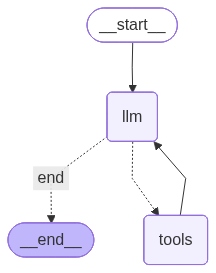

In [3]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))